Please review before to start this tutorial

https://www.youtube.com/watch?v=L1_UfcLOkPc

In [1]:
!pip install -U -q google-generativeai


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.2/164.2 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.3/718.3 kB 9.0 MB/s eta 0:00:00


In [2]:
# import necessary modules.
import google.generativeai as genai

import base64
import io
import json
import mimetypes
import pathlib
import pprint
import requests

import PIL.Image
import IPython.display
from IPython.display import Markdown

Mount Google Drive with your own credentials

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


Set the API key
Add your API_KEY to the secrets manager in the left panel "🔑".
Instructions:
Go to: https://aistudio.google.com/app/prompts/new_chat
Click on the left side: Get API Key
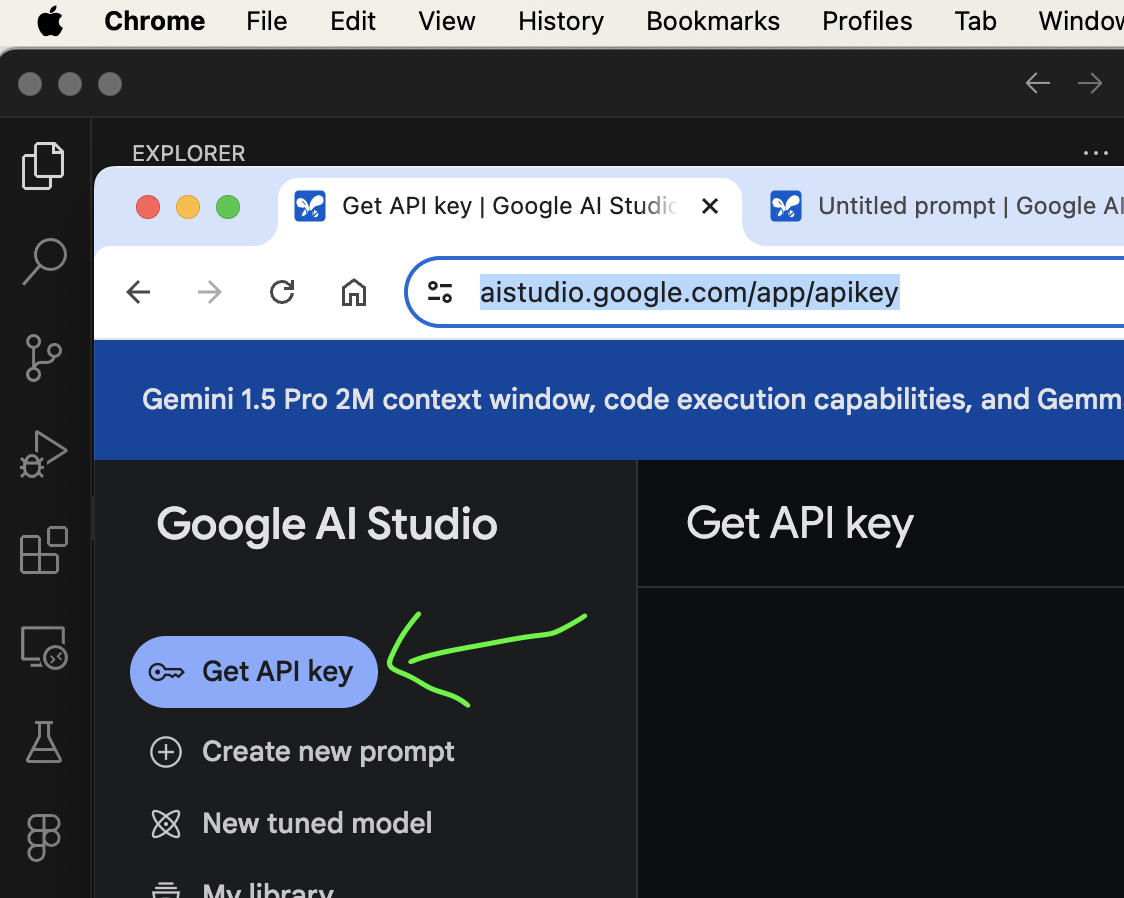

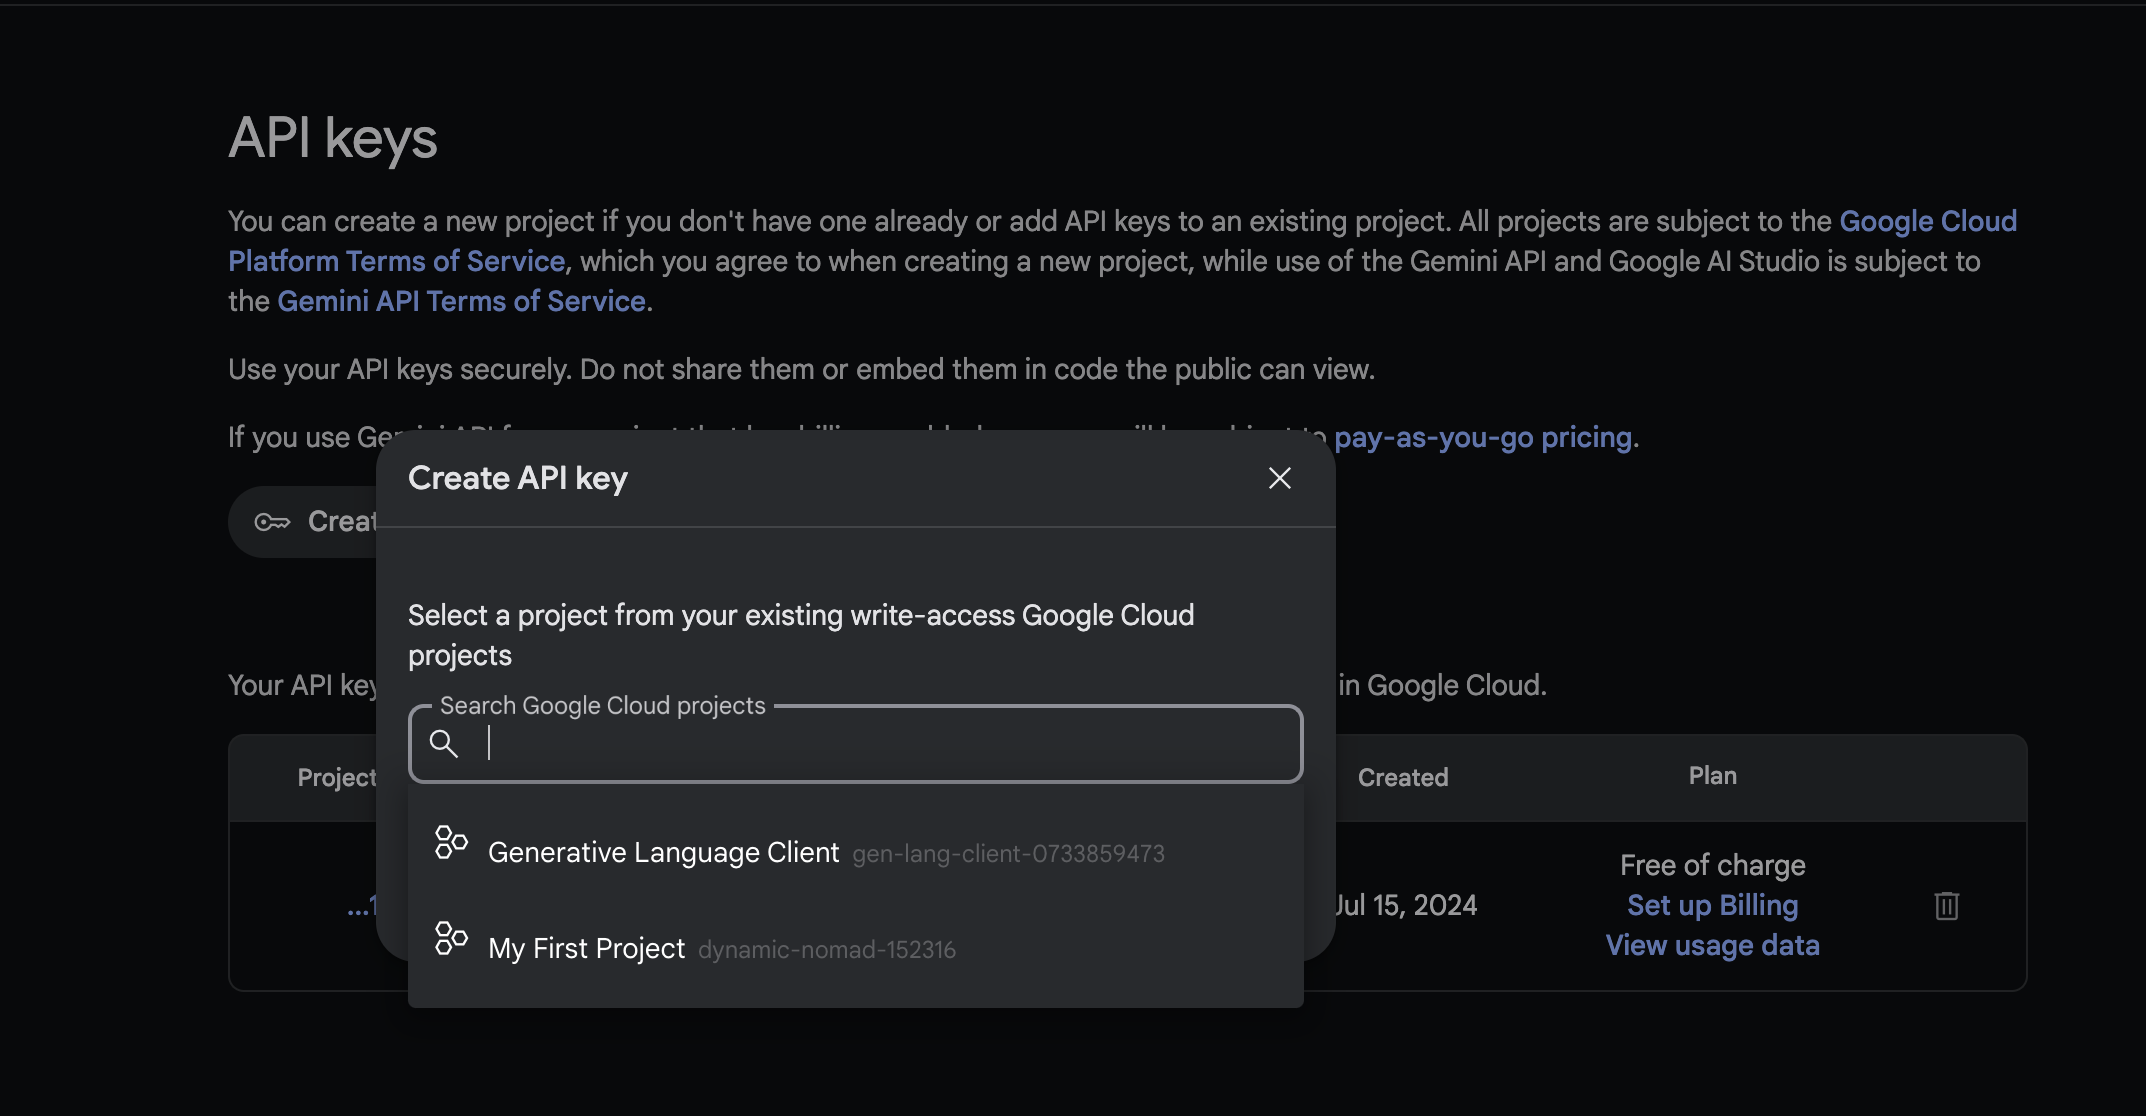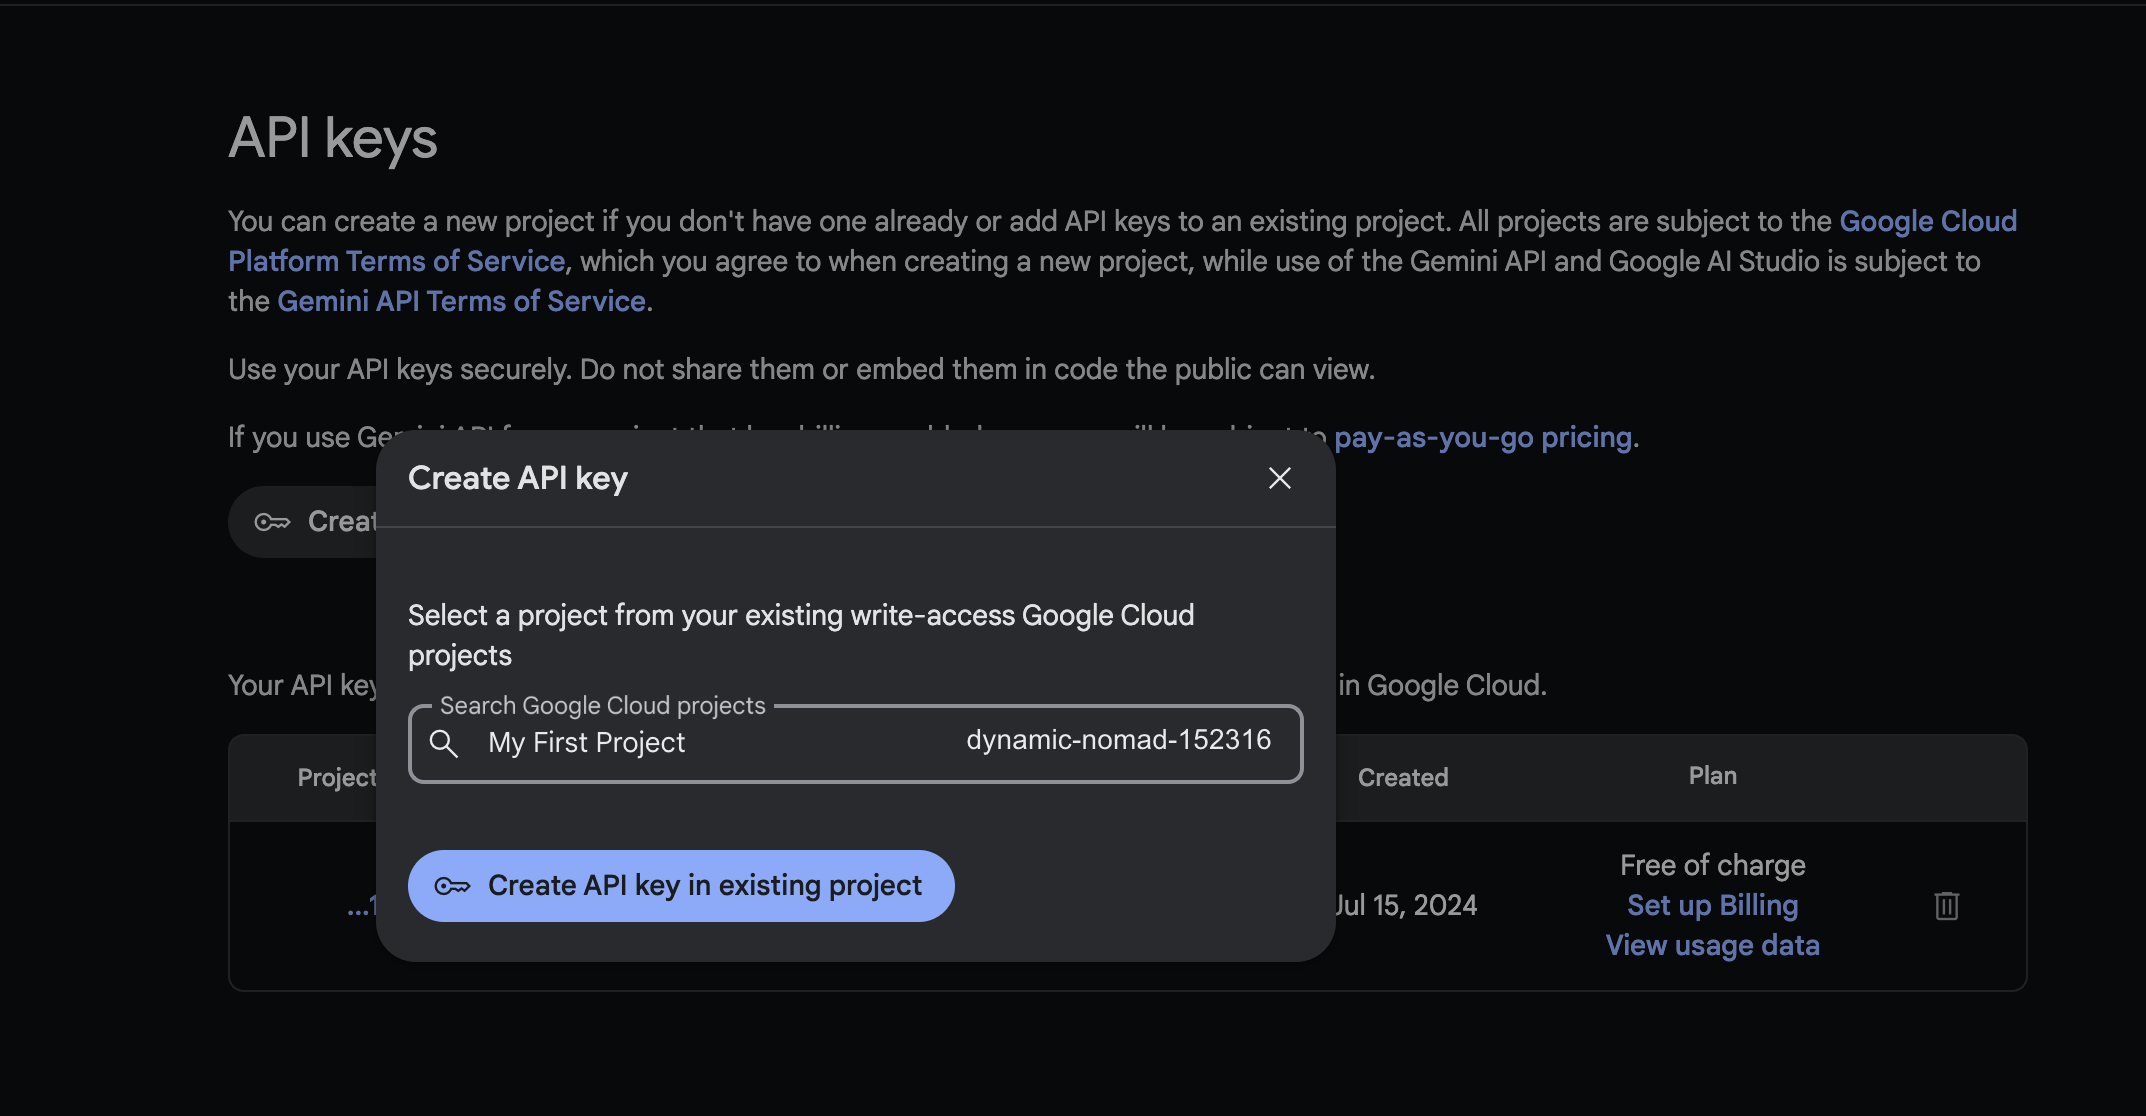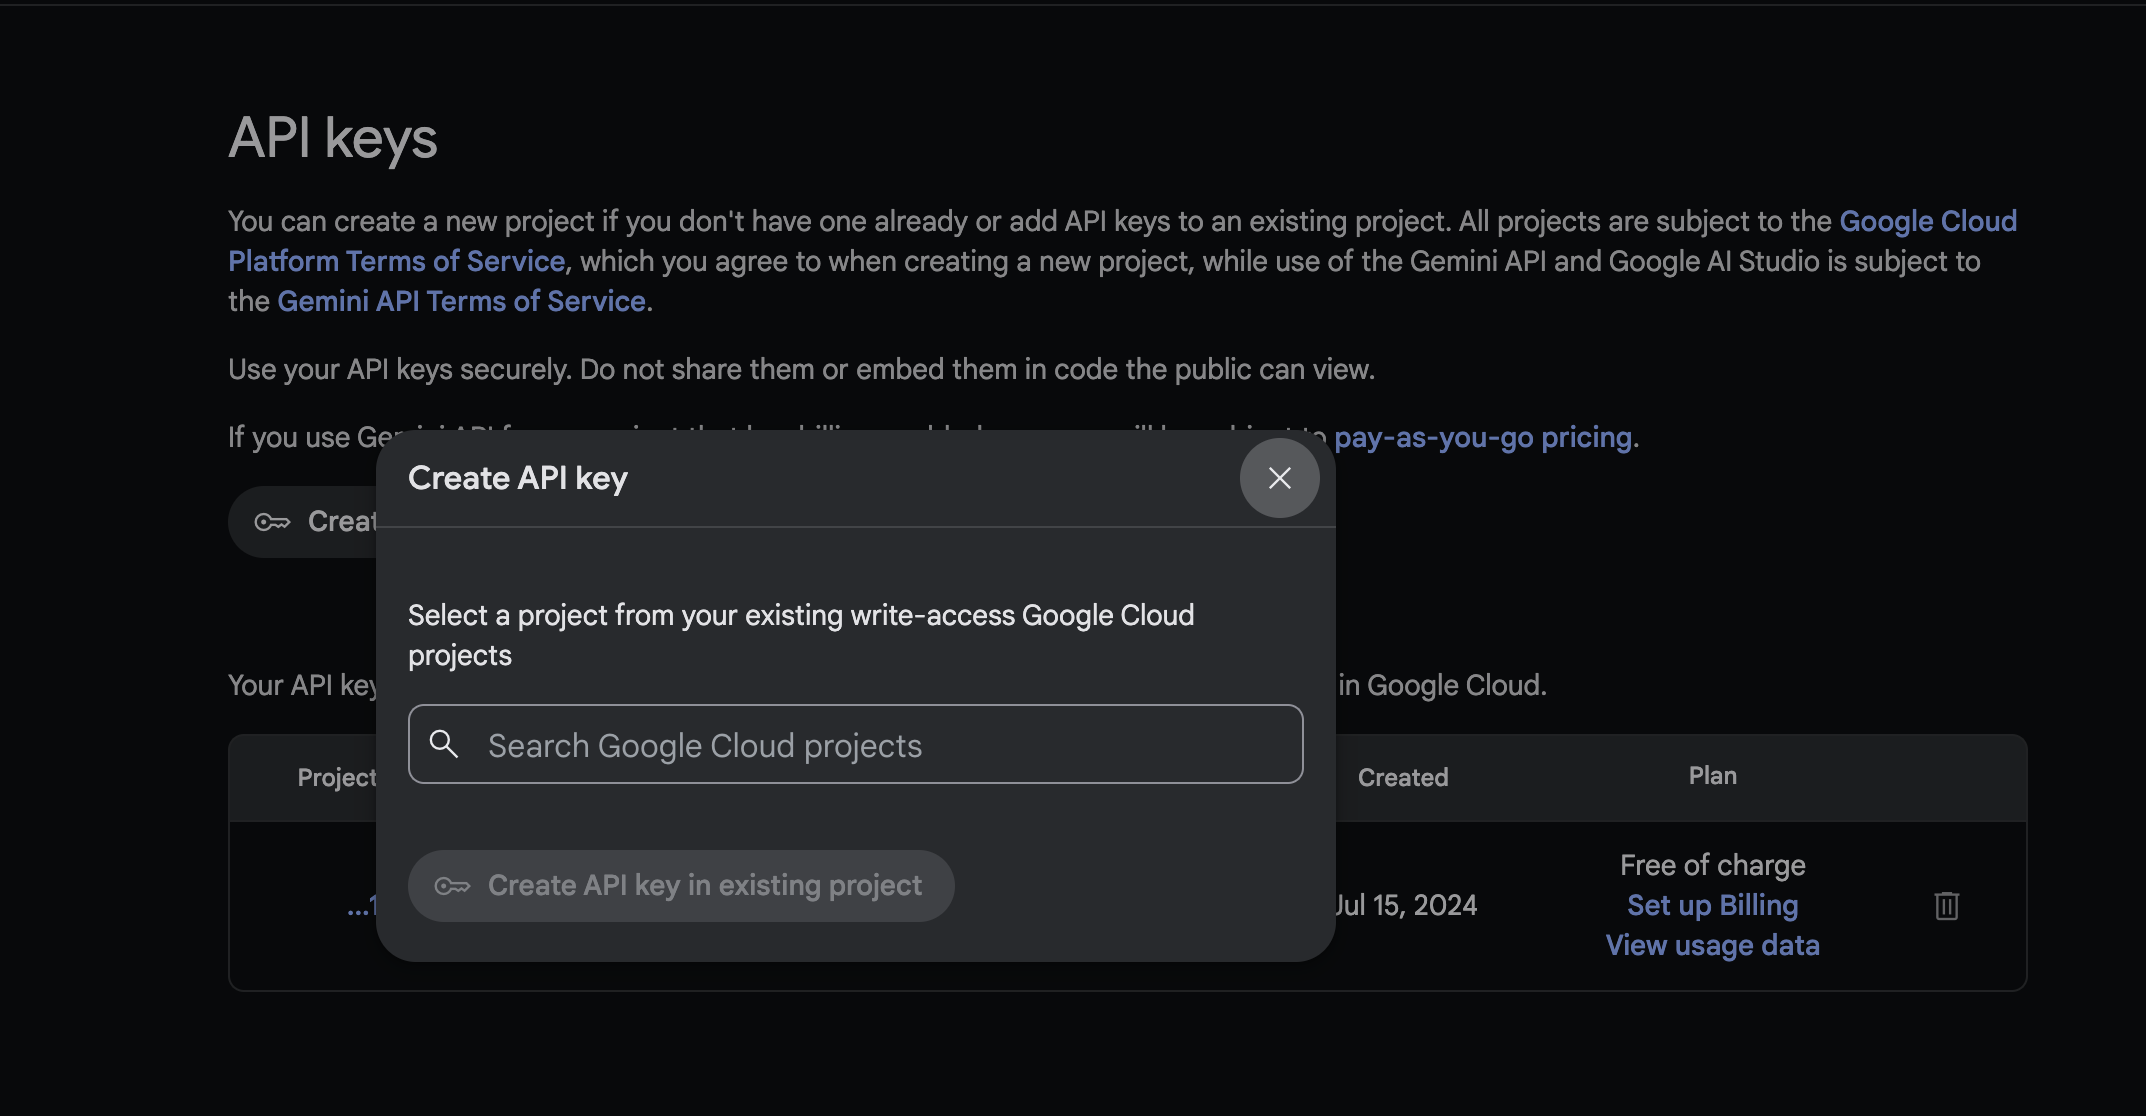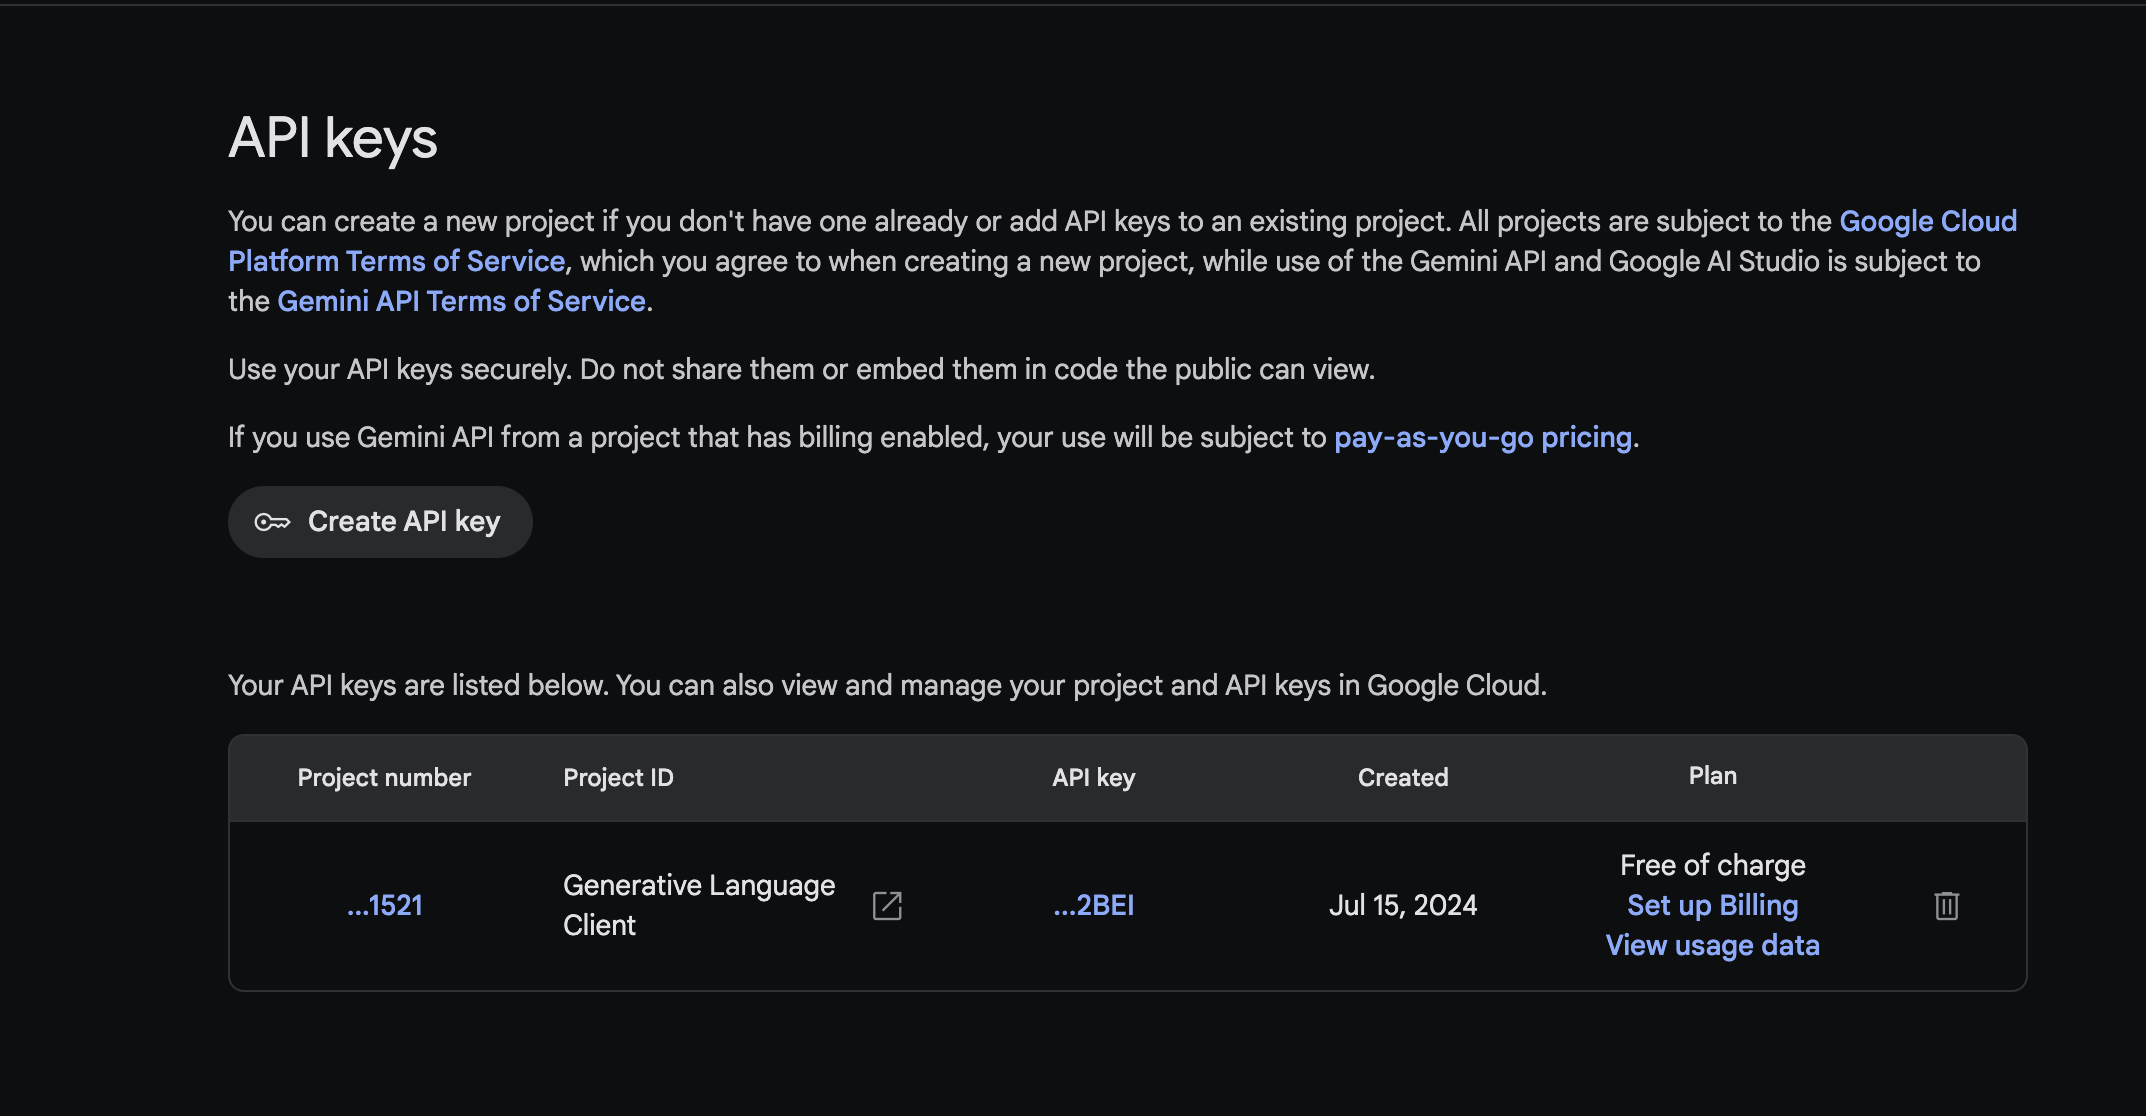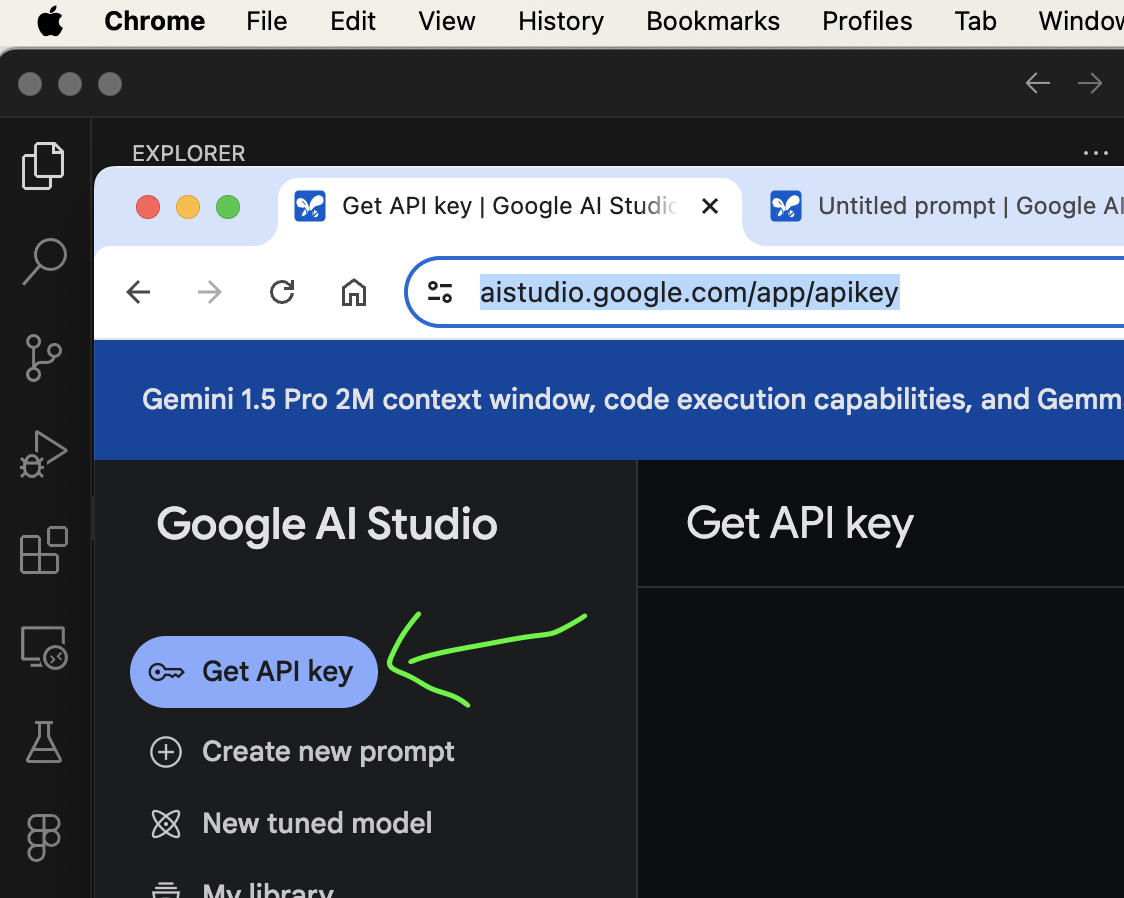

You will need to add your new secret key into the lef panel and add a name, this name need to be replaced in the code in order to call de global variable, example attached


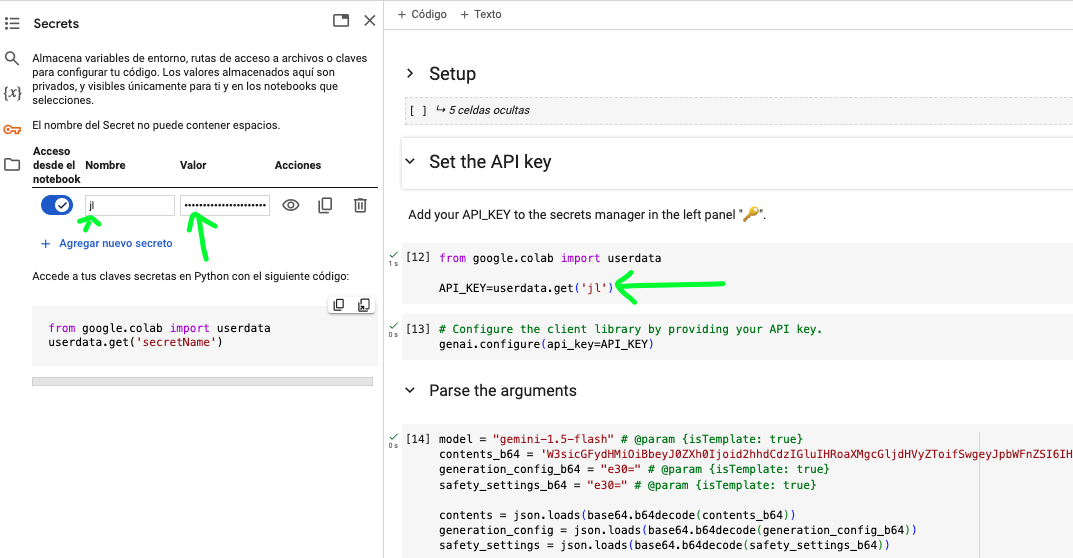

In [5]:
from google.colab import userdata

API_KEY=userdata.get('jl') # HERE YOUR API_KEY

In [6]:
# Configure the client library by providing your API key.
genai.configure(api_key=API_KEY)

In [7]:
model = "gemini-1.5-flash" # @param {isTemplate: true}
contents_b64 = 'W3sicGFydHMiOiBbeyJ0ZXh0Ijoid2hhdCdzIGluIHRoaXMgcGljdHVyZToifSwgeyJpbWFnZSI6IHsiaW1hZ2VfdXJsIjogImh0dHBzOi8vc3RvcmFnZS5nb29nbGVhcGlzLmNvbS9nZW5lcmF0aXZlYWktZG93bmxvYWRzL2ltYWdlcy9zY29uZXMuanBnIn19XX1d' # @param {isTemplate: true}
generation_config_b64 = "e30=" # @param {isTemplate: true}
safety_settings_b64 = "e30=" # @param {isTemplate: true}

contents = json.loads(base64.b64decode(contents_b64))
generation_config = json.loads(base64.b64decode(generation_config_b64))
safety_settings = json.loads(base64.b64decode(safety_settings_b64))

stream = False

In [29]:
contents

[{'parts': [{'text': "what's in this picture:"},
   {'inline_data': {'data': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x02\x02\x02\x03\x02\x02\x02\x03\x03\x03\x03\x04\x06\x04\x04\x04\x04\x04\x08\x06\x06\x05\x06\t\x08\n\n\t\x08\t\t\n\x0c\x0f\x0c\n\x0b\x0e\x0b\t\t\r\x11\r\x0e\x0f\x10\x10\x11\x10\n\x0c\x12\x13\x12\x10\x13\x0f\x10\x10\x10\xff\xdb\x00C\x01\x03\x03\x03\x04\x03\x04\x08\x04\x04\x08\x10\x0b\t\x0b\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\xff\xc0\x00\x11\x08\x03U\x05\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1e\x00\x00\x01\x05\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x05\x03\x04\x06\x07\x08\x02\x01\t\x00\n\xff\xc4\x00R\x10\x00\x02\x01\x03\x03\x02\x04\x04\x04\x04\x03\x07\x02\x02\x01\x15\x01\x02\x03\x04\x05\x11\x00\x06!\x121\x07\x13AQ\x14"aq\x082

In [22]:
generation_config

{}

In [23]:
safety_settings

{}

In [31]:
for content in contents:
  for n, part in enumerate(content['parts']):
    if image:=part.get('image', None):
      if drive_id:=image.get('drive_id', None):
        path = next(pathlib.Path(f'/gdrive/.shortcut-targets-by-id/{drive_id}').glob('*'))
        data = path.read_bytes()
        mime_type, _ = mimetypes.guess_type(path)
      elif image_url:=image.get('image_url', None):
        response = requests.get(image_url)
        data = response.content
        mime_type = response.headers['content-type']
      else:
        raise ValueError('Either drive_id or image_url must be provided.')

      if mime_type is None:
        # Guess!
        mime_type = 'image/png'

      blob = {'data': data, 'mime_type': mime_type}
      content['parts'][n] = {'inline_data': blob}

what's in this picture:


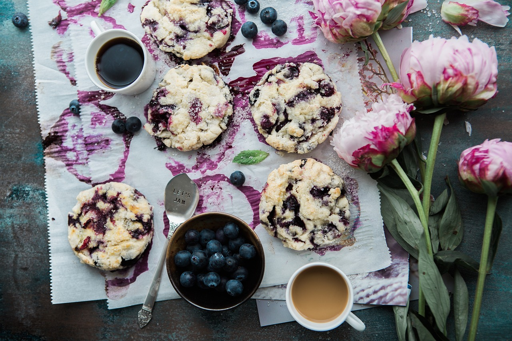

________________________________________________________________________________


In [32]:
import IPython.display
import PIL.Image
import io

for content in contents:
    for part in content['parts']:
        if text := part.get('text', None):
            print(text)
        elif data := part.get('inline_data', None):
            img = PIL.Image.open(io.BytesIO(data['data']))
            img.thumbnail([512,512])
            IPython.display.display(img)
    print('_'*80)

In [33]:
# Call the model and print the response.
gemini = genai.GenerativeModel(model_name=model)

response = gemini.generate_content(
    contents,
    generation_config=generation_config,
    safety_settings=safety_settings,
    stream=False)

**[In the NEXT step you will see how th AI describe the image selected](https://)**

In [34]:
if generation_config.get('candidate_count', 1) == 1:
  display(Markdown(response.text))
else:
  print(response.candidates)

The picture shows a breakfast scene with blueberry scones, coffee, and peonies. There are five blueberry scones on a white piece of parchment paper. There is a small bowl of blueberries next to the scones. Two cups of coffee and a spoon with the words "Let's Jam" are on the paper. Three pink peonies are on the right side of the paper. The background is a dark blue-grey color.

In this step you will see how the information is structured in a format named JSON or Dictionary in Python

In [35]:
response.candidates

[content {
  parts {
    text: "The picture shows a breakfast scene with blueberry scones, coffee, and peonies. There are five blueberry scones on a white piece of parchment paper. There is a small bowl of blueberries next to the scones. Two cups of coffee and a spoon with the words \"Let\'s Jam\" are on the paper. Three pink peonies are on the right side of the paper. The background is a dark blue-grey color."
  }
  role: "model"
}
finish_reason: STOP
index: 0
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]

In [17]:
response.prompt_feedback